In [2]:
import matplotlib.colors as cl
import matplotlib.pyplot as plt
import matplotlib.dates as md
import matplotlib.ticker as plticker

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

import os
import pandas as pd
from pathlib import Path
import numpy as np


from Chapter4.TemporalAbstraction import NumericalAbstraction
from Chapter4.FrequencyAbstraction import FourierTransformation

# Read the result from the previous chapter, and make sure the index is of the type datetime.
DATA_PATH = Path('./intermediate_datafiles/')
DATASET_FNAME = 'chapter3_result_final.csv'
RESULT_FNAME = 'chapter4_result.csv'

figure_path = os.path.abspath('figures/ch_4_1')

In [18]:
def plot_frequencies(data_table, columns, match='like', display='line',size='',title=''):
    plt.xlabel('xlabel', fontsize=0.5)

    point_displays = ['+', 'x'] #'*', 'd', 'o', 's', '<', '>']
    line_displays = ['-'] #, '--', ':', '-.']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    names = list(data_table.columns)

    # Create subplots if more columns are specified.
    if len(columns) > 1:
        f, xar = plt.subplots(len(columns), sharex=True, sharey=False)
    else:
        f, xar = plt.subplots()
        xar = [xar]

    if title != '':
        f.suptitle(title)

    f.subplots_adjust(hspace=0.4)
    f.set_figwidth(10)

    xfmt = md.DateFormatter('%H:%M')

    xar[0].set_prop_cycle(color=['#0343DF'])
    xar[1].set_prop_cycle(color=['#15B01A'])
    xar[2].set_prop_cycle(color=['#E50000'])
    xar[3].set_prop_cycle(color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])

    # Pass through the columns specified.
    for i in range(0, len(columns)):
        xar[i].xaxis.set_major_formatter(xfmt)
        
        if match[i] == 'exact':
            relevant_cols = [columns[i]]
        elif match[i] == 'like':
            relevant_cols = [name for name in names if columns[i] == name[0:len(columns[i])]]
        else:
            raise ValueError("Match should be 'exact' or 'like' for " + str(i) + ".")

        max_values = []
        min_values = []

        # Pass through the relevant columns.
        for j in range(0, len(relevant_cols)):
            # Create a mask to ignore the NaN and Inf values when plotting:
            mask = data_table[relevant_cols[j]].replace([np.inf, -np.inf], np.nan).notnull()
            max_values.append(data_table[relevant_cols[j]][mask].max())
            min_values.append(data_table[relevant_cols[j]][mask].min())

            # Display point, or as a line
            if display[i] == 'points':
                xar[i].plot(data_table.index[mask], data_table[relevant_cols[j]][mask],
                            point_displays[j%len(point_displays)])
            else:
                xar[i].plot(data_table.index[mask], data_table[relevant_cols[j]][mask],
                            line_displays[j%len(line_displays)],linewidth="0.2")

        xar[i].tick_params(axis='y', labelsize=7)

        xar[i].yaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
        xar[3].yaxis.set_major_locator( plticker.MultipleLocator(base=1.0))        
        
        xar[i].legend(relevant_cols, fontsize='xx-small', numpoints=1, loc='upper center',
                        bbox_to_anchor=(0.5, 1.4), ncol=len(relevant_cols), fancybox=False, shadow=False)

        xar[i].set_ylim([min(min_values) - 0.1*(max(max_values) - min(min_values)),
                            max(max_values) + 0.1*(max(max_values) - min(min_values))])

    xar[0].set_ylabel('highest amplitud frequency')
    xar[0].yaxis.set_label_coords(-.05, -1)
    
    # Make sure we get a nice figure with only a single x-axis and labels there.
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.xlabel('time')

    xar[0].xaxis.set_label_coords(.9, -.1)

    # set the spacing between subplots
    plt.subplots_adjust(hspace=0.6)
    plt.ioff()
    
    plt.linewidth=10

    f.patch.set_facecolor('xkcd:white')

    return f


## 4.1 Explore the frequency domain features for the crowdsignals dataset in more detail, consider the individual frequencies for the different measurements and see whether you can find interesting patterns. Do you see consistent amplitudes of certain frequencies during the same activities? And how do the amplitudes differ for the different activities?

In [66]:
try:
    dataset = pd.read_csv(DATA_PATH / DATASET_FNAME, index_col=0)
    dataset.index = pd.to_datetime(dataset.index)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

In [67]:
# Compute the number of milliseconds covered by an instance based on the first two rows
# (the number of ms between all other two consecutive rows its the same (250))
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000

NumAbs = NumericalAbstraction()
FreqAbs = FourierTransformation()

fs = float(1000)/milliseconds_per_instance        ##  fs = sampling rate (wut???)
ws = int(float(10000)/milliseconds_per_instance)  ##  ws = window size

In [69]:
dataset = FreqAbs.abstract_frequency(dataset, ['acc_phone_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_phone_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_phone_z'], ws, fs)

In [8]:
dataset = FreqAbs.abstract_frequency(dataset, ['acc_watch_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_watch_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_watch_z'], ws, fs)

In [9]:
dataset = FreqAbs.abstract_frequency(dataset, ['gyr_phone_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['gyr_phone_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['gyr_phone_z'], ws, fs)

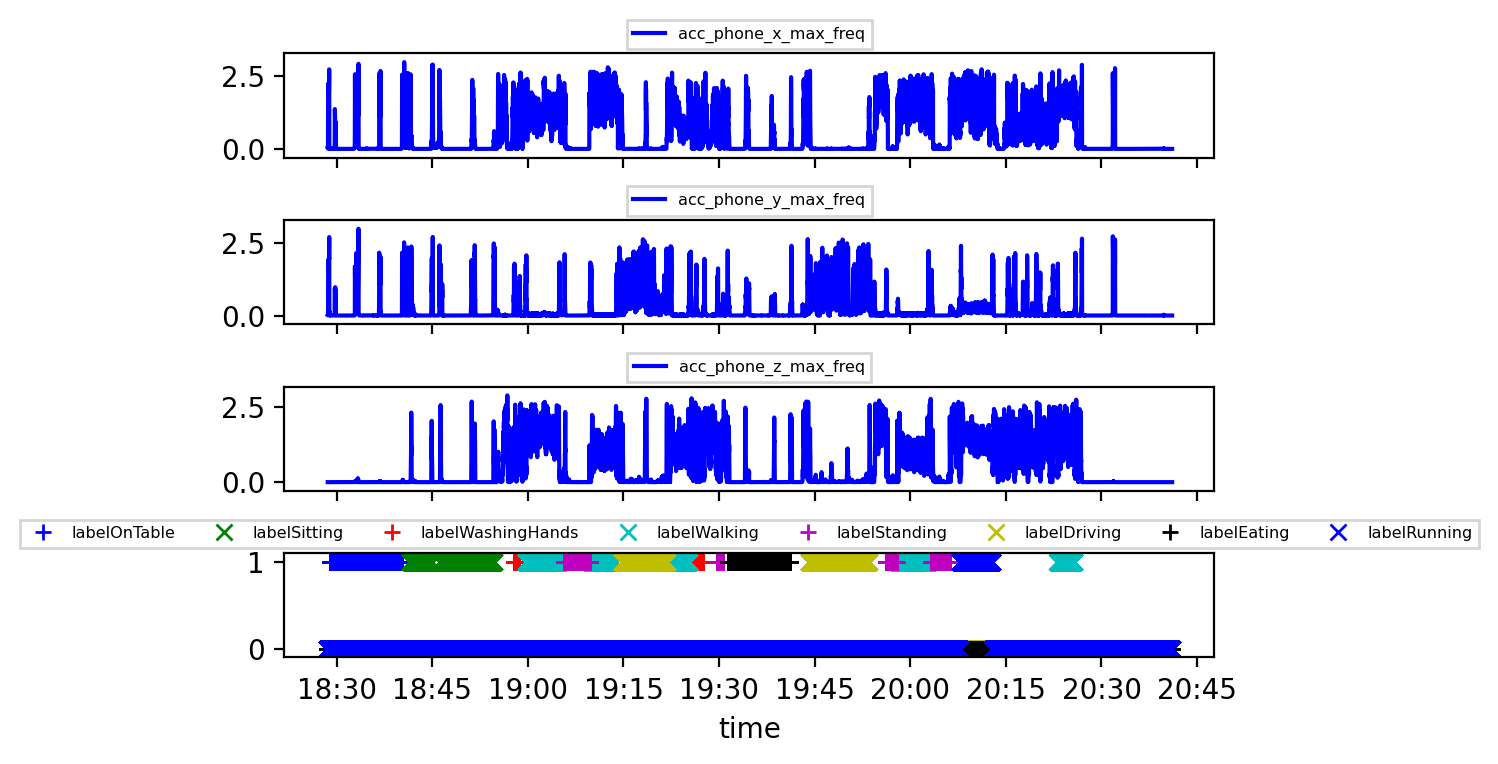

In [17]:
f = plot_frequencies(dataset, ['acc_phone_x_max_freq', 'acc_phone_y_max_freq', 'acc_phone_z_max_freq', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'],title="acc_watch frequencies over all axis")
f

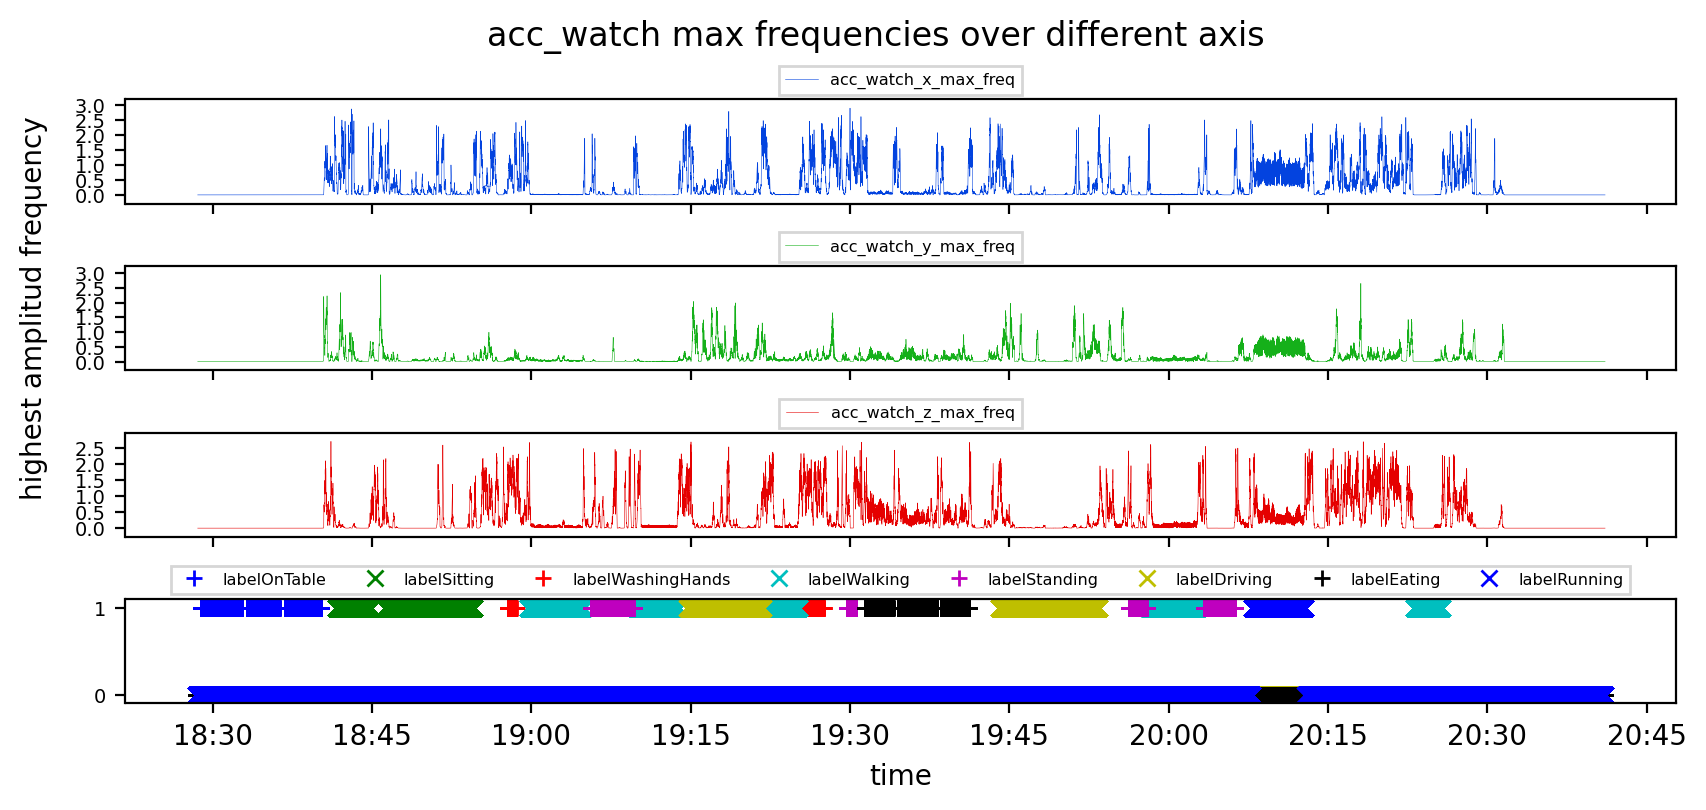

In [19]:
f2 = plot_frequencies(dataset, ['acc_watch_x_max_freq', 'acc_watch_y_max_freq', 'acc_watch_z_max_freq', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'],title="acc_watch max frequencies over different axis")
f2

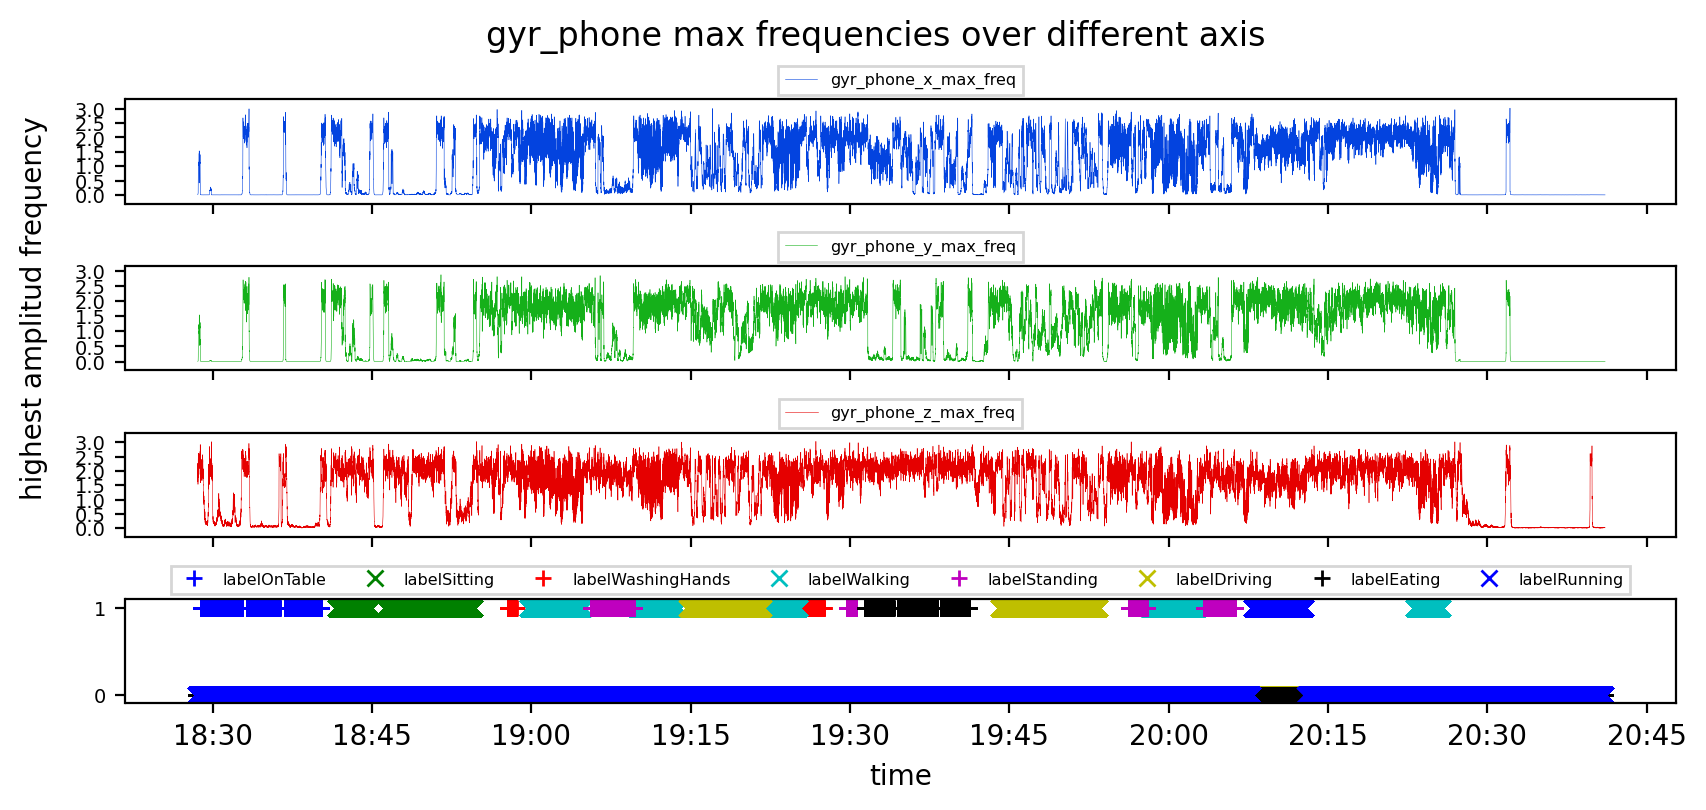

In [20]:
f3 = plot_frequencies(dataset, ['gyr_phone_x_max_freq', 'gyr_phone_y_max_freq', 'gyr_phone_z_max_freq', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'],title='gyr_phone max frequencies over different axis')
f3

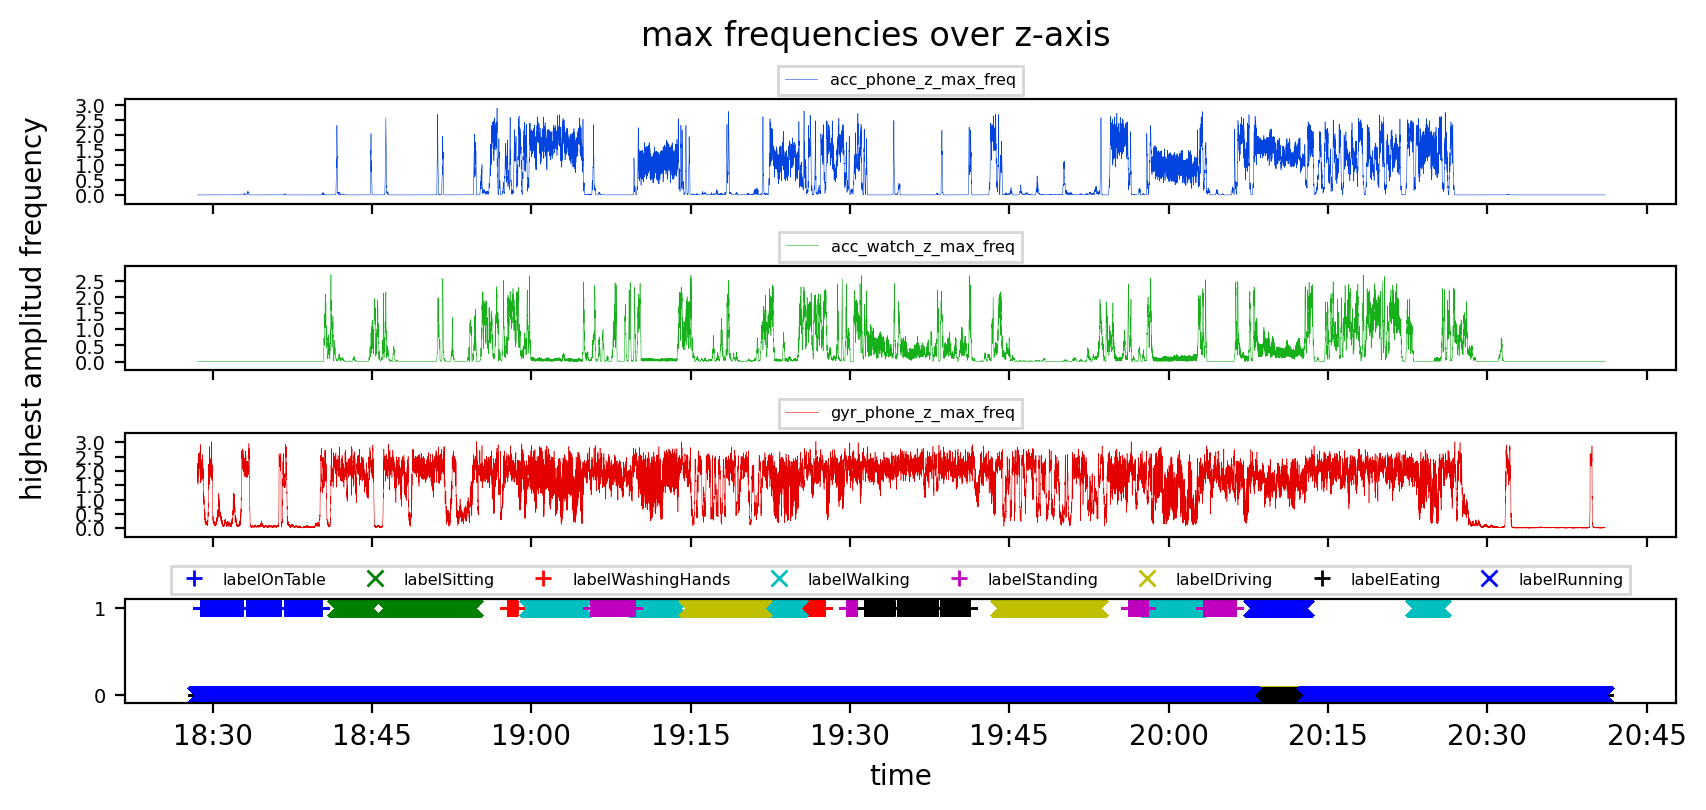

In [21]:
# comparing all Z-freqs
f4 = plot_frequencies(dataset, ['acc_phone_z_max_freq', 'acc_watch_z_max_freq', 'gyr_phone_z_max_freq', 'label'], ['like','like', 'like', 'like'], ['line','line', 'line','points'],title='max frequencies over z-axis')
f4

## 4.3 Use your own dataset you have collected in Chap. 2 or the dataset you have found on the web and apply the approaches that have been explained in this chapter to identify features. Try different settings for the parameters (e.g. the indow size). Report on your findings in a similar way as we have done for the crowdsignals dataset.

In [3]:

DATA_PATH2 = Path('./our_datasets/ch2_1_raw/')
DATASET_FNAME2 = 'boxing_data.csv'

try:
    our_df = pd.read_csv(DATA_PATH2 / DATASET_FNAME2, index_col=0)
    # our_df.index = pd.to_datetime(our_df.index)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

our_df = our_df.rename(columns={"Linear Acceleration x (m/s^2)": "acc_x"})
our_df = our_df.rename(columns={"Linear Acceleration y (m/s^2)": "acc_y"})
our_df = our_df.rename(columns={"Linear Acceleration z (m/s^2)": "acc_z"})
our_df = our_df.rename(columns={"Absolute acceleration (m/s^2)": "acc_abs"})

our_df


,acc_x,acc_y,acc_z,acc_abs
Time (s),,,,
0.061874,-0.012595,0.234416,0.261410,0.351347
0.066911,0.071366,0.244199,0.210297,0.330077
0.071947,0.160429,0.196512,0.151078,0.295261
0.076984,0.392639,0.234954,0.118217,0.472593
0.082012,0.702538,0.352884,0.162493,0.802802
...,...,...,...,...
480.043054,-0.026543,0.017191,0.002428,0.031717
480.048090,-0.023996,-0.004382,0.028541,0.037545
480.053127,-0.014295,-0.004292,0.009295,0.017583


In [4]:
# Compute the number of milliseconds covered by an instance based on the first two rows
# (the number of ms between all other two consecutive rows its the same (5ms))
ms_per_instance2 = round((our_df.index[1] - our_df.index[0])*1000,0)

NumAbs2 = NumericalAbstraction()
FreqAbs2 = FourierTransformation()

fs2 = float(1000)/ms_per_instance2        ##  fs = sampling rate (wut???)
ws2 = int(float(10000)/ms_per_instance2)  ##  ws = window size

In [204]:
fs2 = float(4)
ws2 = int(40)

In [199]:
fs2 = float(500)/ms_per_instance2
ws2 = int(float(5000)/ms_per_instance2)

In [5]:
our_df = FreqAbs2.abstract_frequency(our_df, ['acc_x'], ws2, fs2)
# our_df = FreqAbs.abstract_frequency(our_df, ['acc_y'], ws2, fs2)
# our_df = FreqAbs.abstract_frequency(our_df, ['acc_z'], ws2, fs2)
# our_df = FreqAbs.abstract_frequency(our_df, ['acc_abs'], ws2, fs2)


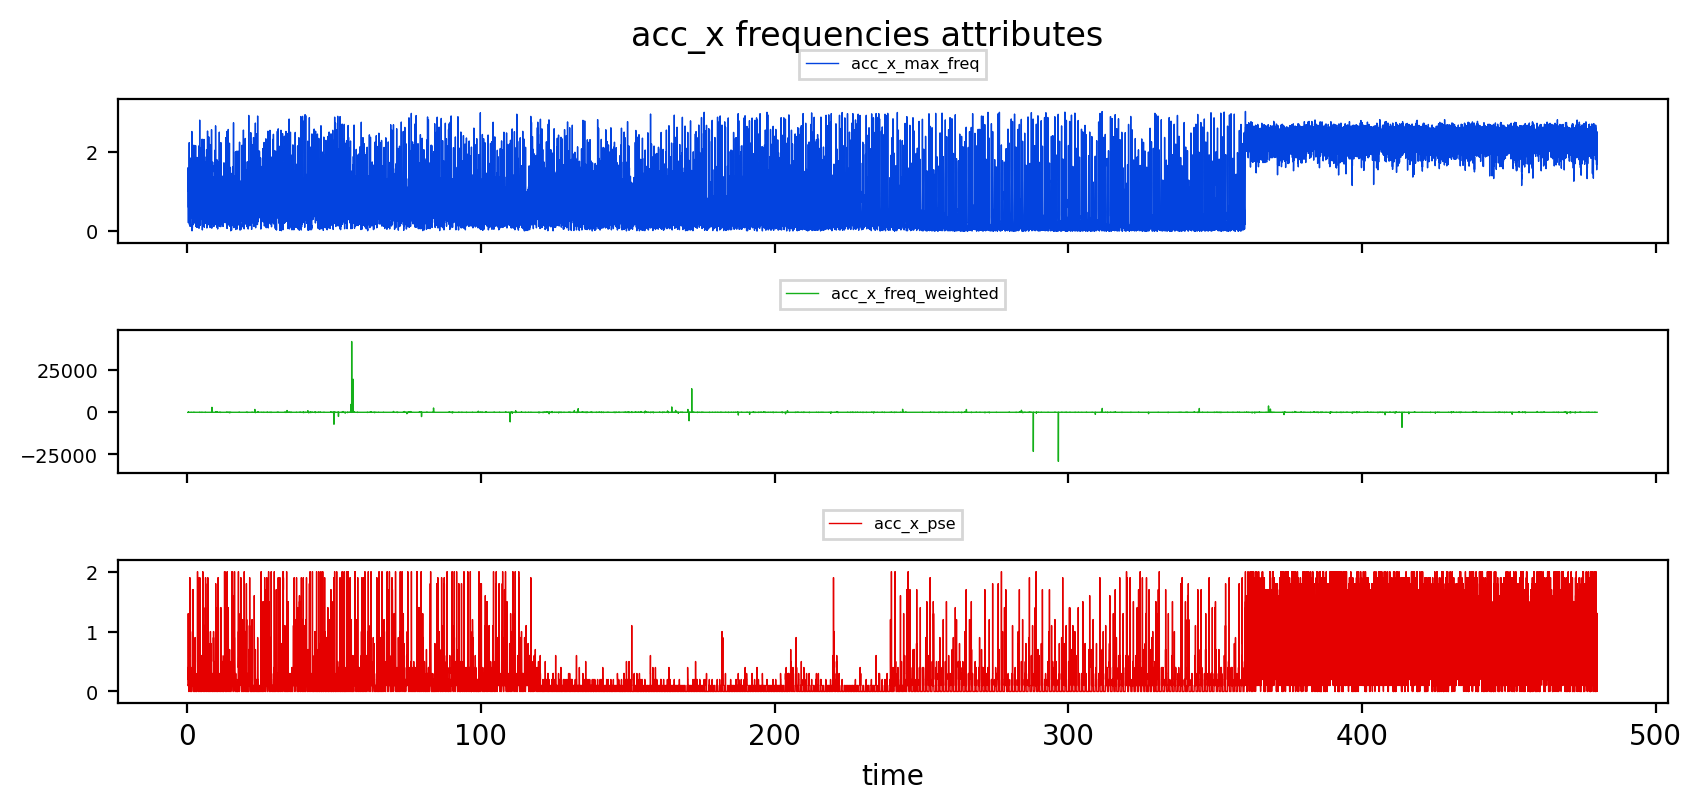

In [160]:
f_4_2 = plot_frequencies_ourDF(our_df, ['acc_x_max_freq', 'acc_x_freq_weighted', 'acc_x_pse'], ['like','like', 'like'], ['line','line', 'line'],title="acc_x frequencies attributes")
f_4_2

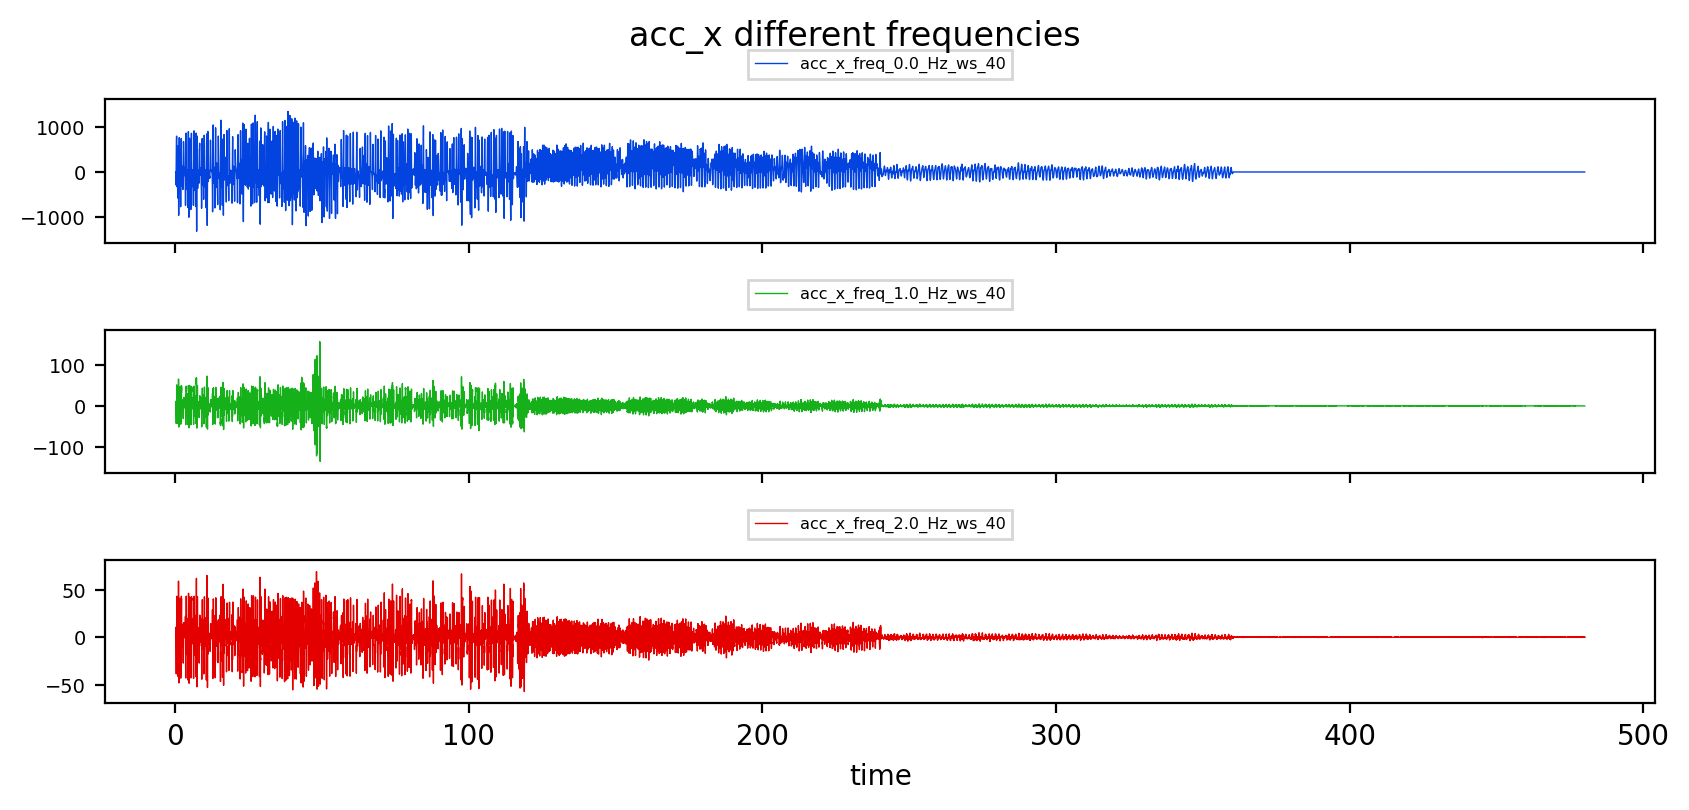

In [206]:
f_4_3 = plot_frequencies_ourDF(our_df, ['acc_x_freq_0.0_Hz_ws_40', 'acc_x_freq_1.0_Hz_ws_40', 'acc_x_freq_2.0_Hz_ws_40'], ['like','like', 'like'], ['line','line', 'line'],title="acc_x different frequencies")
f_4_3

C:\Users\Martin\AppData\Local\Temp\ipykernel_16624\3546019812.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, xar = plt.subplots(len(columns), sharex=True, sharey=False)


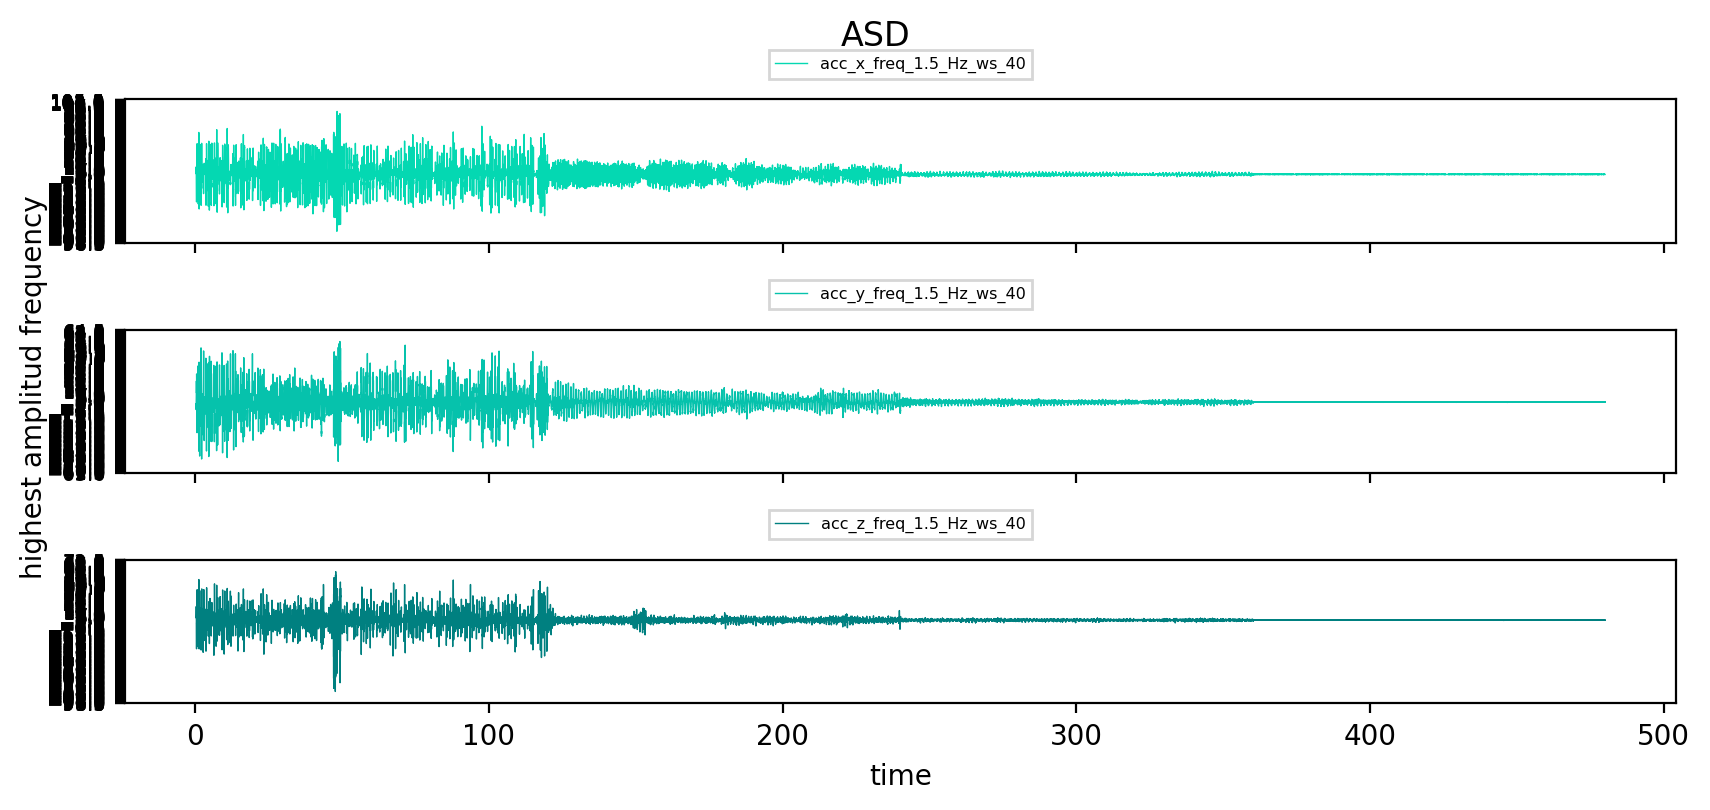

In [290]:
f_4_2_2 = plot_frequencies_ourDF(our_df, ['acc_x_freq_1.5_Hz_ws_40', 'acc_y_freq_1.5_Hz_ws_40', 'acc_z_freq_1.5_Hz_ws_40'], ['like','like', 'like'], ['line','line', 'line'],title="ASD")
f_4_2_2

In [9]:
def plot_frequencies_ourDF(data_table, columns, match='like', display='line',size='',title=''):
    plt.xlabel('xlabel', fontsize=0.5)

    line_displays = ['-'] #, '--', ':', '-.']
    
    names = list(data_table.columns)

    # Create subplots if more columns are specified.
    if len(columns) > 1:
        f, xar = plt.subplots(len(columns), sharex=True, sharey=False)
    else:
        f, xar = plt.subplots()
        xar = [xar]

    if title != '':
        f.suptitle(title)

    f.subplots_adjust(hspace=0.4)
    f.set_figwidth(10)

    xar[0].set_prop_cycle(color=['#0343DF'])
    xar[1].set_prop_cycle(color=['#15B01A'])
    xar[2].set_prop_cycle(color=['#E50000'])

    # Pass through the columns specified.
    for i in range(0, len(columns)):
        #xar[i].xaxis.set_major_formatter(xfmt)
        
        if match[i] == 'exact':
            relevant_cols = [columns[i]]
        elif match[i] == 'like':
            relevant_cols = [name for name in names if columns[i] == name[0:len(columns[i])]]
        else:
            raise ValueError("Match should be 'exact' or 'like' for " + str(i) + ".")

        max_values = []
        min_values = []

        # Pass through the relevant columns.
        for j in range(0, len(relevant_cols)):
            # Create a mask to ignore the NaN and Inf values when plotting:
            mask = data_table[relevant_cols[j]].replace([np.inf, -np.inf], np.nan).notnull()
            max_values.append(data_table[relevant_cols[j]][mask].max())
            min_values.append(data_table[relevant_cols[j]][mask].min())


            xar[i].plot(data_table.index[mask], data_table[relevant_cols[j]][mask],
                            line_displays[j%len(line_displays)],linewidth="0.5")

        xar[i].tick_params(axis='y', labelsize=7)

        # xar[i].yaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
        
        xar[i].legend(relevant_cols, fontsize='xx-small', numpoints=1, loc='upper center',
                        bbox_to_anchor=(0.5, 1.4), ncol=len(relevant_cols), fancybox=False, shadow=False)

        xar[i].set_ylim([min(min_values) - 0.1*(max(max_values) - min(min_values)),
                            max(max_values) + 0.1*(max(max_values) - min(min_values))])

    # xar[0].set_ylabel('YLabel', {loc='top'})
    xar[0].set_ylabel('')
    xar[0].yaxis.set_label_coords(-.05, -1)
    
    # Make sure we get a nice figure with only a single x-axis and labels there.
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.xlabel('time')
    # plt.ylabel('highest amplitud frequency',{pos='top'})
    

    xar[0].xaxis.set_label_coords(.9, -.1)
    # set the spacing between subplots
    plt.subplots_adjust(hspace=0.6)
    plt.ioff()
    
    plt.linewidth=10

    f.patch.set_facecolor('xkcd:white')

    return f